In [1]:
import plot_utils as pu

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
df = pd.read_csv("./data/timing_table.txt", delimiter="\t", index_col=0)

In [4]:
df.dtypes

seconds_wall_clock    float64
reads_per_minute      float64
gbyte_memory          float64
percent_cpu             int64
cpu_hours             float64
tool                   object
threads                 int64
dtype: object

In [5]:
df.head()

,seconds_wall_clock,reads_per_minute,gbyte_memory,percent_cpu,cpu_hours,tool,threads
0,116.41,1.546259e+07,7.584920,2721,1.034756,utree,32
1,112.89,1.594472e+07,7.586948,2978,1.003467,utree,32
2,1979.34,9.093940e+05,7.273708,100,0.549817,utree,1
3,124.27,1.448459e+07,7.409492,1510,0.552311,utree,16
4,189.74,9.486666e+06,7.335080,773,0.421644,utree,8


In [6]:
#9235008 ./combined_seqs.fna
infile_gbytes = 9235008/1e6

In [7]:
df = df.sort_values("tool")

df_means = df.groupby(["tool", "threads"]).mean().reset_index()

tools = ["burst", "bowtie2", "centrifuge", "kraken", "utree"]
index_tools = dict(zip(tools, range(len(tools))))

df_means["index_tools"] = df_means.tool.map(index_tools)


display_names = dict(zip(tools, ["BURST", "Bowtie2", "Centrifuge", "Kraken", "UTree"]))

df_means["display_names"] = df_means.tool.map(display_names)

colors = dict(zip(tools, ["#1a1895", "#000000", "#0c5050", "#148d4a", "#bd86e8"]))

df_means["colors"] = df_means.tool.map(colors)

markers = dict(zip(tools, ["s", "v", "o", "^", "d"]))

df_means["markers"] = df_means.tool.map(markers)
df_means.sort_values('index_tools', inplace=True)

In [8]:
df_means.columns

Index(['tool', 'threads', 'seconds_wall_clock', 'reads_per_minute',
       'gbyte_memory', 'percent_cpu', 'cpu_hours', 'index_tools',
       'display_names', 'colors', 'markers'],
      dtype='object')

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


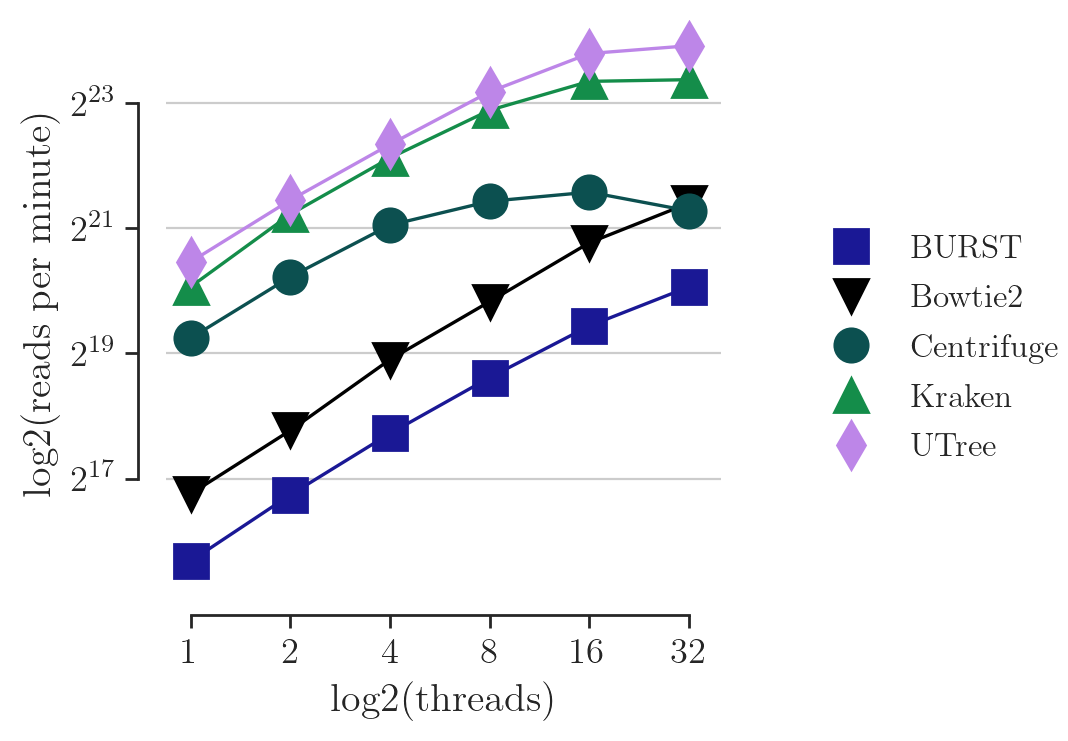

In [9]:
# We are interested in the speed up and efficiency of each of the aligners
# y-axis: RAM Usage
# x-axis: N (workers)
# sns.set_style("whitegrid")

sns.set(context="paper", style="ticks", palette="colorblind", font='serif', font_scale=1.5, color_codes=True, rc=pu.figure_setup())
fig_size = pu.get_fig_size(10, 10)
fig, ax = plt.subplots(figsize=fig_size)
# sns.pointplot(x="tool", y="gbyte_memory", data=df, ax=ax)

for name, df in df_means.groupby("tool"):
    ax.plot(df.threads, df.reads_per_minute, color=df.colors.values[0], marker=df.markers.values[0], markersize=12)

# for index, row in df_means.iterrows():
#     ax.plot([row.threads], [row.reads_per_minute], marker=row.markers, color=row.colors, markersize=12)
    
#     ax.annotate("%.1f GB" % row.gbyte_memory, (row.index_tools, row.gbyte_memory), verticalalignment="bottom", horizontalalignment="left")

ax.yaxis.grid(True)
ax.xaxis.grid(False)

ax.set_xscale("log", basex=2)
ax.set_xlim(0, 40)
ax.set_xticks([1, 2, 4, 8, 16, 32])

ax.set_yscale("log", basey=2)
# ax.set_ylim(2e13, 2e17)
# ax.set_yticks([10e4, 10e5, 10e6,])

# ax.plot(ax.get_xlim(), [infile_gbytes]*2, 'r', label='input file size', zorder=0)


pltname = "ram_bar"
plt.ylabel("log2(reads per minute)")
ax.minorticks_off()


plt.xlabel("log2(threads)")
labels = [1, 2, 4, 8, 16, 32]
# labels[0] = 1
# labels[1] = 2
# labels[2] = 4
# labels[3] = 8
# labels[4] = 16
# labels[5] = 32

pu.stylize_axes(ax)
pu.stylize_fig(fig)


ax.set_xticklabels(labels)

artists = pu.custom_legend(fig, ["#1a1895", "#000000", "#0c5050", "#148d4a", "#bd86e8"], ["BURST", "Bowtie2", "Centrifuge", "Kraken", "UTree"], ["s", "v", "o", "^", "d"])

artists.set_frame_on(False)
plt.tight_layout()
pu.save_plot(fig, "reads_per_minute", artists=(artists,))